# **BIMA BAYU SAPUTRA**
# **08 || 2141720019**
# **TI-3H**
# **Jobsheet 7**

## **K-Means Clustering**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Baca data
data = pd.read_csv('./data/Mall_Customers.csv')

In [3]:
# Pilih fitur yang relevan
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Percobaan untuk menemukan jumlah cluster yang optimal
cluster_range = range(2, 11)
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

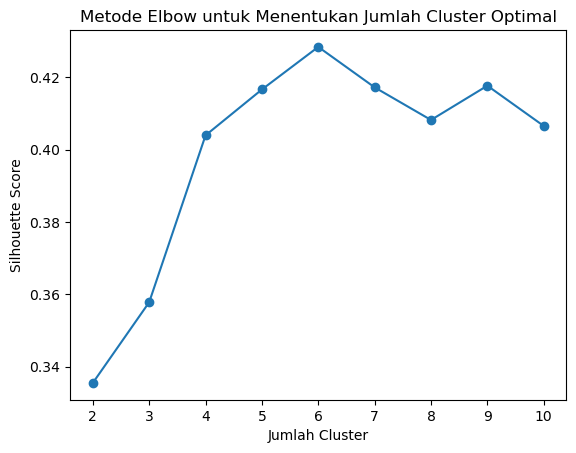

In [6]:
# Plot metode elbow
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [7]:
# Pilih jumlah cluster yang optimal
num_clusters = 6

In [8]:
# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


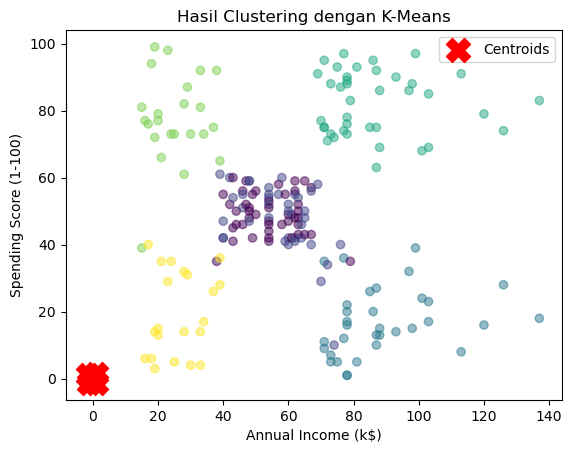

In [9]:
# Visualisasi hasil clustering
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil Clustering dengan K-Means')
plt.legend()
plt.show()

Saya sudah menggunakan standarisasi atau normalisasi pada fitur sebelum melatih model K-Means, sehingga pusat klaster yang dihasilkan akan mengikuti skala yang diterapkan pada data. Standarisasi biasanya menghasilkan fitur dengan mean 0 dan deviasi standar 1. Oleh karena itu, pusat klaster yang ditemukan oleh algoritma juga akan cenderung berada di sekitar 0.

In [10]:
# Tampilkan dataframe dengan kolom Cluster
print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        4
1     21                  15                      81        4
2     20                  16                       6        5
3     23                  16                      77        4
4     31                  17                      40        5
..   ...                 ...                     ...      ...
195   35                 120                      79        3
196   45                 126                      28        2
197   32                 126                      74        3
198   32                 137                      18        2
199   30                 137                      83        3

[200 rows x 4 columns]


## **SOM with image**

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from PIL import Image

In [118]:
# Fungsi untuk mengonversi citra menjadi dataset yang sesuai untuk SOM
def create_dataset(image):
    width, height = image.size
    pixels = np.array(image.getdata())
    return pixels / 255.0 

In [119]:
# Fungsi untuk mengonversi hasil SOM menjadi citra yang di-segmentasi
def create_segmented_image(image_data, som, width, height):
    segmented_image = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            pixel = image_data[i * width + j] 
            winner = som.winner(pixel)
            segmented_image[i, j] = som.get_weights()[winner[0], winner[1]] * 255 

    return segmented_image

In [144]:
# Load citra
input_image_path = "./img/buah.png"
original_image = Image.open(input_image_path)

In [145]:
# Konversi citra menjadi dataset
image_data = create_dataset(original_image)

In [146]:
# Tentukan ukuran SOM (grid)
som_grid_size = (20, 20) 

In [147]:
# Inisialisasi dan latih model SOM
som = MiniSom(som_grid_size[0], som_grid_size[1], image_data.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(image_data, 1000)

In [148]:
# Membuat citra hasil segmentasi
segmented_image = create_segmented_image(image_data, som, original_image.width, original_image.height)

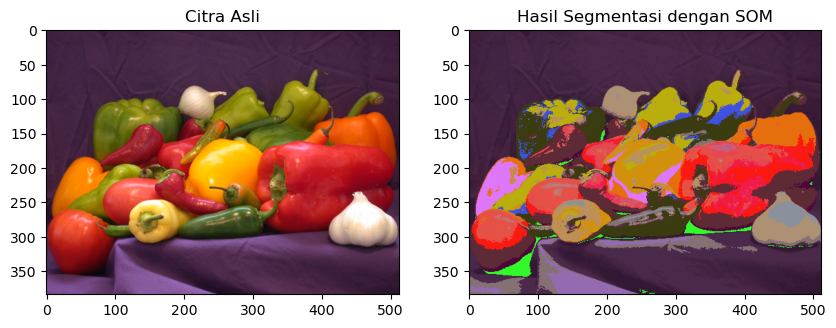

In [149]:
# Tampilkan citra asli dan hasil segmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Citra Asli")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Hasil Segmentasi dengan SOM")

plt.show()